<a href="https://colab.research.google.com/github/Atharv-1905/Machine-Learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Descent as Stochastic Gradient Descent**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [10]:
# 1. Create simple dummy data (y = 3x + 4)
# We create 100 random points
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.ravel() # Flatten y to a 1D array (required for SGD)



In [11]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 3. SCALE DATA (CRITICAL FOR GRADIENT DESCENT!)
# Unlike the Normal Equation, Gradient Descent breaks if features represent
# vastly different scales (e.g., 0-1 vs 0-1000).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Updation Formula :**

$$w_{new} = w_{old} - \alpha \times \frac{\partial J}{\partial w}$$

1)  Let's break it down:$w_{old}$: Your current weight (slope).

2)  $\frac{\partial J}{\partial w}$ (Gradient): This is the "slope of the mountain." It tells you which direction the error increases.We calculate the derivative of the Cost Function (MSE) with respect to the weight.

3)  $\alpha$ (Alpha/Learning Rate): A small number (e.g., 0.01). It controls how big of a step you take.

4)  Minus Sign ($-$): This is crucial. The gradient points uphill (towards higher error). We want to go downhill, so we subtract the gradient.

In [13]:

# 4. Train with SGDRegressor
# max_iter=1000: The number of "steps" (epochs) to take down the mountain
# eta0=0.1: The initial Learning Rate (Alpha)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

sgd_reg.fit(X_train_scaled, y_train)

# 5. Check Results
print(f"Intercept (b): {sgd_reg.intercept_[0]:.2f}")
print(f"Coefficient (m): {sgd_reg.coef_[0]:.2f}")



Intercept (b): 7.33
Coefficient (m): 1.71


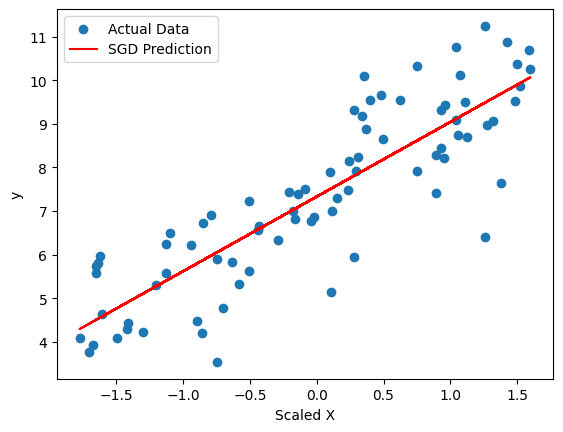

In [14]:
# 6. Visualization
plt.scatter(X_train_scaled, y_train, label='Actual Data')
plt.plot(X_train_scaled, sgd_reg.predict(X_train_scaled), color='red', label='SGD Prediction')
plt.xlabel('Scaled X')
plt.ylabel('y')
plt.legend()
plt.show()